### **What is LSTM?**

LSTM (Long Short-Term Memory) is a special type of Recurrent Neural Network (RNN) used to work with sequences of data (like time series or text). It helps the model remember important information for longer periods and forget irrelevant details. This makes it great for tasks like predicting stock prices, generating text, or recognizing speech.

---

### **Why Do We Need LSTM?**

Regular RNNs are good at handling sequences, but they struggle to remember information over a long time. This is known as the "vanishing gradient problem," where the model forgets earlier information as it processes new inputs. LSTMs were designed to solve this problem.

---

### **How Does LSTM Work?**

An LSTM has three main components (called **gates**) that decide how information flows through it:

1. **Forget Gate**: 
   - This gate decides what information from the past should be **forgotten**. 
   - For example, if you're trying to predict the next word in a sentence, the forget gate might decide that an irrelevant word from earlier in the sentence should be ignored.

2. **Input Gate**: 
   - This gate controls what **new information** should be added to memory.
   - For instance, if you're predicting the next word in a sentence, it might add the current word to the memory.

3. **Output Gate**:
   - This gate decides what part of the **memory** should be used for making predictions or outputs.
   - For example, after updating the memory, it will decide what should be passed on as the final prediction.

In [1]:
import numpy as np

class LSTM:
    def __init__(self, input_dim, hidden_dim, output_dim):
        # Dimensions
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim

        # Initialize weights for input, forget, cell, and output gates
        self.Wf = np.random.randn(hidden_dim, input_dim + hidden_dim) * 0.1
        self.Wi = np.random.randn(hidden_dim, input_dim + hidden_dim) * 0.1
        self.Wc = np.random.randn(hidden_dim, input_dim + hidden_dim) * 0.1
        self.Wo = np.random.randn(hidden_dim, input_dim + hidden_dim) * 0.1

        self.bf = np.zeros((hidden_dim, 1))
        self.bi = np.zeros((hidden_dim, 1))
        self.bc = np.zeros((hidden_dim, 1))
        self.bo = np.zeros((hidden_dim, 1))

        # Output weights
        self.Wy = np.random.randn(output_dim, hidden_dim) * 0.1
        self.by = np.zeros((output_dim, 1))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def tanh(self, x):
        return np.tanh(x)

    def forward(self, x, h_prev, c_prev):
        # Concatenate input and hidden state
        concat = np.vstack((h_prev, x))

        # Forget gate
        f_t = self.sigmoid(np.dot(self.Wf, concat) + self.bf)

        # Input gate
        i_t = self.sigmoid(np.dot(self.Wi, concat) + self.bi)
        c_tilde = self.tanh(np.dot(self.Wc, concat) + self.bc)

        # Cell state
        c_t = f_t * c_prev + i_t * c_tilde

        # Output gate
        o_t = self.sigmoid(np.dot(self.Wo, concat) + self.bo)
        h_t = o_t * self.tanh(c_t)

        # Output prediction
        y_t = np.dot(self.Wy, h_t) + self.by

        return h_t, c_t, y_t

    def train(self, X, y, n_epochs=10, learning_rate=0.01):
        # Initialize hidden and cell states
        h_prev = np.zeros((self.hidden_dim, 1))
        c_prev = np.zeros((self.hidden_dim, 1))

        for epoch in range(n_epochs):
            total_loss = 0
            for t in range(X.shape[1]):  # Iterate through time steps
                x_t = X[:, t].reshape(-1, 1)
                y_t = y[:, t].reshape(-1, 1)

                # Forward pass
                h_prev, c_prev, y_pred = self.forward(x_t, h_prev, c_prev)

                # Compute loss (mean squared error)
                loss = np.mean((y_pred - y_t) ** 2)
                total_loss += loss

                # Backpropagation (simplified version, gradient computation omitted)
                # Normally here you would compute gradients and update weights.

            print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {total_loss:.4f}")

# Example usage
if __name__ == "__main__":
    # Generate toy data for a simple time series task
    seq_length = 10
    input_dim = 1
    hidden_dim = 50
    output_dim = 1

    # Random data
    X = np.sin(np.linspace(0, 2 * np.pi, seq_length)).reshape(1, -1)  # Shape (1, seq_length)
    y = np.cos(np.linspace(0, 2 * np.pi, seq_length)).reshape(1, -1)  # Shape (1, seq_length)

    # Create LSTM model
    lstm = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim)

    # Train the model
    lstm.train(X, y, n_epochs=100, learning_rate=0.01)


Epoch 1/100, Loss: 5.3941
Epoch 2/100, Loss: 5.3716
Epoch 3/100, Loss: 5.3716
Epoch 4/100, Loss: 5.3716
Epoch 5/100, Loss: 5.3716
Epoch 6/100, Loss: 5.3716
Epoch 7/100, Loss: 5.3716
Epoch 8/100, Loss: 5.3716
Epoch 9/100, Loss: 5.3716
Epoch 10/100, Loss: 5.3716
Epoch 11/100, Loss: 5.3716
Epoch 12/100, Loss: 5.3716
Epoch 13/100, Loss: 5.3716
Epoch 14/100, Loss: 5.3716
Epoch 15/100, Loss: 5.3716
Epoch 16/100, Loss: 5.3716
Epoch 17/100, Loss: 5.3716
Epoch 18/100, Loss: 5.3716
Epoch 19/100, Loss: 5.3716
Epoch 20/100, Loss: 5.3716
Epoch 21/100, Loss: 5.3716
Epoch 22/100, Loss: 5.3716
Epoch 23/100, Loss: 5.3716
Epoch 24/100, Loss: 5.3716
Epoch 25/100, Loss: 5.3716
Epoch 26/100, Loss: 5.3716
Epoch 27/100, Loss: 5.3716
Epoch 28/100, Loss: 5.3716
Epoch 29/100, Loss: 5.3716
Epoch 30/100, Loss: 5.3716
Epoch 31/100, Loss: 5.3716
Epoch 32/100, Loss: 5.3716
Epoch 33/100, Loss: 5.3716
Epoch 34/100, Loss: 5.3716
Epoch 35/100, Loss: 5.3716
Epoch 36/100, Loss: 5.3716
Epoch 37/100, Loss: 5.3716
Epoch 38/1

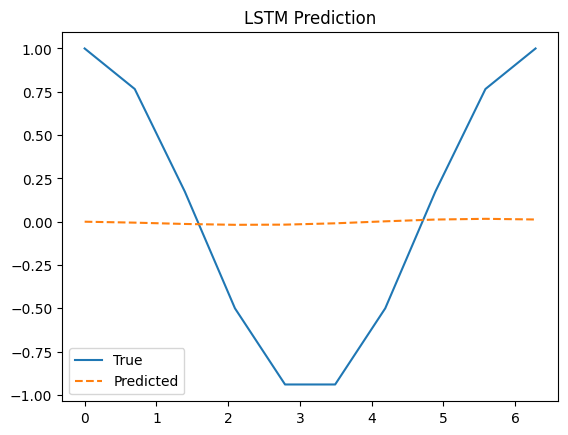

In [2]:
# After training
y_pred = []
h_prev = np.zeros((hidden_dim, 1))
c_prev = np.zeros((hidden_dim, 1))

for t in range(X.shape[1]):
    x_t = X[:, t].reshape(-1, 1)
    h_prev, c_prev, y_t = lstm.forward(x_t, h_prev, c_prev)
    y_pred.append(y_t.flatten()[0])

# Plot predictions vs ground truth
import matplotlib.pyplot as plt
plt.plot(np.linspace(0, 2 * np.pi, seq_length), y.flatten(), label="True")
plt.plot(np.linspace(0, 2 * np.pi, seq_length), y_pred, label="Predicted", linestyle='--')
plt.legend()
plt.title("LSTM Prediction")
plt.show()
